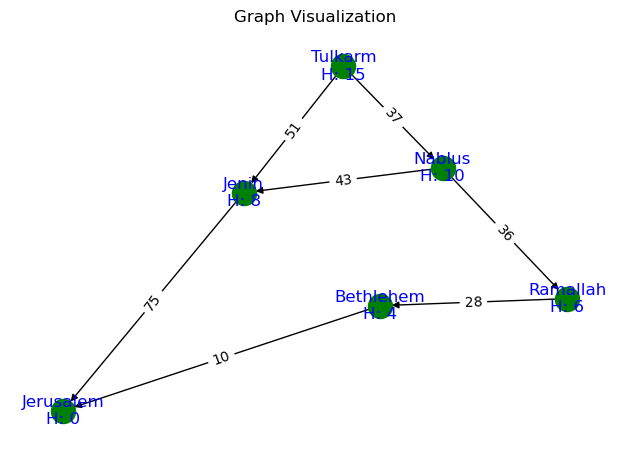

In [57]:
import networkx as nx  #To create and analyze graphs   
import matplotlib.pyplot as plt #To draw graphs

graph = {
    'Tulkarm': [('Nablus', 37), ('Jenin', 51)],
    'Nablus': [('Ramallah', 36), ('Jenin', 43)],
    'Ramallah': [('Bethlehem', 28)],
    'Bethlehem': [('Jerusalem', 10)],
    'Jenin': [('Jerusalem', 75)]
}

h_table = {
    'Tulkarm': 15,
    'Nablus': 10,
    'Ramallah': 6,
    'Bethlehem': 4,
    'Jenin': 8,
    'Jerusalem': 0
}


G = nx.DiGraph() 


for node, edges in graph.items():
    for edge, cost in edges:
        G.add_edge(node, edge, weight=cost)


pos = nx.spring_layout(G) 

nx.draw_networkx_nodes(G, pos, node_color='green') 

nx.draw_networkx_edges(G, pos) 

  
node_labels = {node: f"{node}\nH: {h_table[node]}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='blue')


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


pos_fixed = pos.copy()
pos_fixed['Tulkarm'] = (pos_fixed['Tulkarm'][0], 1.0)


plt.title('Graph Visualization') 
plt.axis('off') 
plt.tight_layout() 
plt.subplots_adjust(top=0.9) 
plt.show() 


# ____________________________________________________________________

# THE CODE

In [129]:
graph = {
    'Tulkarm': [('Nablus', 37), ('Jenin', 51)],
    'Nablus': [('Ramallah', 36), ('Jenin', 43)],
    'Ramallah': [('Bethlehem', 28)],
    'Bethlehem': [('Jerusalem', 10)],
    'Jenin': [('Jerusalem', 75)]
}


h_table = {
    'Tulkarm': 15,
    'Nablus': 10,
    'Ramallah': 6,
    'Bethlehem': 4,
    'Jenin': 8,
    'Jerusalem': 0
}

def path_h_cost(path):
    last_node = path[-1][0]
    h_cost = h_table[last_node]
    return h_cost

def path_F_cost(path):
    g_cost = 0
    for (node, cost) in path:
        g_cost += cost
    last_node = path[-1][0]
    h_cost = h_table[last_node]
    f_cost = g_cost + h_cost
    return f_cost, last_node

start = 'Tulkarm'
end = 'Jerusalem'

def dfs(graph, start,goal):
    root = start
    s, temp, path, visited = [root], [], [], []
    parent = {root: None}
    while s:
        v = s.pop()
        visited.append(v)
        if v == goal:
            while parent[goal]:
                path.insert(0, goal)
                goal = parent[goal]
            path.insert(0, root)
            break
        for node, _ in graph.get(v, []):
            if node not in visited:
                temp.append(node)
                parent[node] = v
        while temp:
            s.append(temp.pop())
    return path, visited
dfs_path, dfs_visited = dfs(graph, start ,end)
#print("DFS Solution is:", dfs_path)
#print("Visited nodes:", dfs_visited)



from collections import deque
def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = [start]

    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path, visited[:-1]

        for neighbor, _ in graph.get(node, []):
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append((neighbor, path + [neighbor]))

    return None

bfs_path, bfs_visited = bfs(graph, start, end)

#if bfs_path:
    #print("BFS Solution is:", bfs_path)
#else:
    #print("No solution found.")

#print("Visited nodes:", bfs_visited)




import heapq
def ucs(graph, start, goal):
    visited = []
    PQ = [(0, start, [start])]  
    
    while PQ:
        (cost, node, path) = heapq.heappop(PQ)
        if node not in visited:
            visited.append(node)
            
            if node == goal:
                return cost, path, visited
            
            for (adj_node, adj_cost) in graph.get(node, []):
                if adj_node not in visited:
                    total_cost = cost + adj_cost
                    heapq.heappush(PQ, (total_cost, adj_node, path + [adj_node]))
    
    return None, None, None

ucs_cost, ucs_path, ucs_visited = ucs(graph, start, end)

#if ucs_cost is not None:
    #print("UCS Solution is:", ucs_path)
    #print("Cost of Solution is:", ucs_cost)
    #print("Visited nodes:", ucs_visited)
#else:
    #print("No path found.")

 

def A_star(graph, start, goal):
    visited = []
    Queue = [[(start, 0)]]
    while Queue:
        Queue.sort(key=path_F_cost)  # sorting by cost
        path = Queue.pop(0)      # lowest cost
        node = path[-1][0]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path, visited
        else:
            adjacent_nodes = graph.get(node, [])
            for (node2, cost) in adjacent_nodes:
                new_path = path.copy()
                new_path.append((node2, cost))
                Queue.append(new_path)

def pathcost(path):
    return sum(cost for _, cost in path)  #The underscore _ is used as a placeholder for the node value, which is not needed in this case.
                                        

a_solution, a_visited_nodes = A_star(graph, start, end)
#if a_solution:
    #print('A* Solution is:', [node for node, _ in a_solution])  
    #print('Cost of Solution is:', pathcost(a_solution))
    #print('Visited nodes:', a_visited_nodes)
#else:
    #print('No solution found.')
    


def gbs(graph, start, goal):
    visited = []
    Queue = [[(start, 0)]]
    while Queue:
        Queue.sort(key=path_h_cost)  
        path = Queue.pop(0)  
        node = path[-1][0]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path, visited
        else:
            adjacent_nodes = graph.get(node, [])
            for (node2, cost) in adjacent_nodes:
                new_path = path.copy()
                new_path.append((node2, cost))
                Queue.append(new_path)

g_solution, g_visited_nodes = gbs(graph, start, end)
#if g_solution:
    #print('Greedy Solution is:', [node for node, _ in g_solution])
    #print('Cost of Solution is:', pathcost(g_solution))
    #print('Visited nodes:', g_visited_nodes)
#else:
    #print('No solution found.')
    
 

def hill_climbing(graph, start, goal):
    current_node = start
    path = [(start, 0)]
    visited = [start]  
    while current_node != goal:
        adjacent_nodes = graph.get(current_node, [])
        if not adjacent_nodes:
            break
        best_node = min(adjacent_nodes, key=lambda x: h_table[x[0]])
        current_node = best_node[0]
        path.append(best_node)
        visited.append(current_node)  # Add the visited node to the list
    return path, visited

hill_solution, hill_visited_nodes = hill_climbing(graph, start, end)
#if hill_solution:
    #print('Hill Climbing Solution is:', [node for node, _ in hill_solution])
    #print('Cost of Solution is:', pathcost(hill_solution))
    #print('Visited nodes:', hill_visited_nodes)
#else:
    #print('No solution found.') 
   

# ________________________________________

# The Output Table

In [130]:
import pandas as pd
from IPython.display import display, HTML


data = [
    ['DFS', dfs_visited, dfs_path,'[ ]'],
    ['BFS', bfs_visited, bfs_path, '[ ]'],
    ['UCS', ucs_visited, ucs_path, ucs_cost],
    ['A*', a_visited_nodes, [node for node, _ in a_solution], pathcost(a_solution)],
    ['Greedy BS', g_visited_nodes, [node for node, _ in g_solution], pathcost(g_solution)],
    ['Hill Climbing', hill_visited_nodes, [node for node, _ in hill_solution], pathcost(hill_solution)]
]
columns = ['Algorithm', 'Visited', 'Solution', 'Cost']

df = pd.DataFrame(data, columns=columns)

styled_table = df.style.applymap(lambda x: f'background-color: #ceded1; font-size: small', subset=pd.IndexSlice[:, :])


styled_table.set_table_styles([
    {'selector': 'tr', 'props': [('border', '1px solid black')]}
])

display(HTML(styled_table.to_html()))

,Algorithm,Visited,Solution,Cost
0,DFS,"['Tulkarm', 'Nablus', 'Ramallah', 'Bethlehem', 'Jerusalem']","['Tulkarm', 'Nablus', 'Ramallah', 'Bethlehem', 'Jerusalem']",[ ]
1,BFS,"['Tulkarm', 'Nablus', 'Jenin', 'Ramallah', 'Jerusalem']","['Tulkarm', 'Jenin', 'Jerusalem']",[ ]
2,UCS,"['Tulkarm', 'Nablus', 'Jenin', 'Ramallah', 'Bethlehem', 'Jerusalem']","['Tulkarm', 'Nablus', 'Ramallah', 'Bethlehem', 'Jerusalem']",111
3,A*,"['Tulkarm', 'Nablus', 'Jenin', 'Ramallah', 'Bethlehem', 'Jerusalem']","['Tulkarm', 'Nablus', 'Ramallah', 'Bethlehem', 'Jerusalem']",111
4,Greedy BS,"['Tulkarm', 'Jenin', 'Jerusalem']","['Tulkarm', 'Jenin', 'Jerusalem']",126
5,Hill Climbing,"['Tulkarm', 'Jenin', 'Jerusalem']","['Tulkarm', 'Jenin', 'Jerusalem']",126
